In [1]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("/content/Investment_acquisition.csv")
data=data.drop("Unnamed: 0", axis=1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20,23,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
for i in range(data.shape[0]):
  data.loc[i, 'Count']=1

In [ ]:
data

In [10]:
data

,object_id,acquired_object_id,term_code,acquisition_price_amount,acquisition_price_currency_code,acquired_at,source_url_acquisition,source_description_acquisition,acquisition_creation_date,acquisition_update_date,funding_round_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url_Funding,source_description_Funding,created_by_Funding,Funding_creation_date,Funding_update_date,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude
0,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05,380,1998-08-01,angel,angel,100000.0,100000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,1,0,1,http://www.google.com/corporate/history.html,NaN,initial-importer,2007-08-18 09:03:04,2011-08-01 20:45:59,58,Google Headquarters,SF Bay,1600 Amphitheatre Parkway,NaN,Mountain View,NaN,CA,USA,37.421972,-122.084143
1,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05,380,1998-08-01,angel,angel,100000.0,100000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,1,0,1,http://www.google.com/corporate/history.html,NaN,initial-importer,2007-08-18 09:03:04,2011-08-01 20:45:59,5132,Google Ann Arbor,Detroit,112 S. Main St.,2nd Floor,Ann Arbor,48104,MI,USA,42.280988,-83.748882
2,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05,380,1998-08-01,angel,angel,100000.0,100000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,1,0,1,http://www.google.com/corporate/history.html,NaN,initial-importer,2007-08-18 09:03:04,2011-08-01 20:45:59,5133,Google Atlanta,Atlanta,10 10th Street NE,Suite 600,Atlanta,30309,GA,USA,33.781466,-84.387519
3,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05,380,1998-08-01,angel,angel,100000.0,100000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,1,0,1,http://www.google.com/corporate/history.html,NaN,initial-importer,2007-08-18 09:03:04,2011-08-01 20:45:59,5134,Google Austin,Austin,Plaza 7000,"7000 North MoPac Expressway, 2nd Floor",Austin,78731,TX,USA,30.351416,-97.751382
4,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05,380,1998-08-01,angel,angel,100000.0,100000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,1,0,1,http://www.google.com/corporate/history.html,NaN,initial-importer,2007-08-18 09:03:04,2011-08-01 20:45:59,5135,Google Boulder,Denver,2590 Pearl Street,Suite 100,Boulder,80302,CO,USA,40.021416,-105.260931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35364,c:129,c:142814,NaN,0.0,USD,2013-12-10,http://techcrunch.com/2013/12/10/dailymotion-b...,Dailymotion Buys SublimeVideo Developer Jilion...,2013-12-10 17:59:00,2013-12-10 17:59:00,9089,2009-10-23,series-c+,c,25000000.0,25000000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,5,1,0,http://eu.techcrunch.com/2009/10/22/dailymotio...,"DailyMotion raises â¬17 million, with French ...",arun,2009-10-10 09:58:56,2010-01-11 20:45:31,120263,NaN,Japan - Other,NaN,NaN,NaN,NaN,NaN,JPN,0.000000,0.000000
35365,c:205470,c:45837,NaN,0.0,USD,2013-12-10,http://www.nytimes.com/2013/12/11/business/med...,Vice Media Buys a Tech Company to Experiment W...,2013-12-11 12:53:10,2013-12-11 12:53:10,45974,2013-08-19,venture,unattributed,70000000.0,70000000.0,USD,0.0,0.0,USD,0.0,0.0,U

In [9]:
data.describe()

,acquisition_price_amount,funding_round_id,raised_amount_usd,raised_amount,pre_money_valuation_usd,pre_money_valuation,post_money_valuation_usd,post_money_valuation,participants,is_first_round,is_last_round,office_id,latitude,longitude
count,3.536900e+04,35369.000000,3.536900e+04,3.536900e+04,3.536900e+04,3.536900e+04,3.536900e+04,3.536900e+04,35369.000000,35369.000000,35369.000000,35369.000000,35369.000000,35369.000000
mean,1.016413e+08,9923.441149,3.439117e+07,3.462331e+07,5.314753e+07,5.314753e+07,5.197023e+06,5.197150e+06,1.806441,0.414431,0.415251,22079.854110,21.225721,-34.386044
std,8.442607e+08,15290.581451,1.338130e+08,1.344977e+08,8.726788e+08,8.726788e+08,1.456325e+08,1.456325e+08,1.619207,0.492630,0.492772,31734.004059,23.309516,57.025586
min,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,4.000000,-38.721137,-123.103986
25%,0.000000e+00,380.000000,1.000000e+05,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,5151.000000,0.000000,-84.387519
50%,0.000000e+00,381.000000,1.028842e+07,1.028842e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,5185.000000,30.281130,0.000000
75%,0.000000e+00,16304.000000,2.500000e+07,2.500000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,1.000000,1.000000,25808.000000,40.743662,0.000000
max,2.810000e+10,57903.000000,3.835050e+09,3.835050e+09,1.500000e+10,1.500000e+10,9.000000e+09,9.000000e+09,21.000000,1.000000,1.000000,127781.000000,65.617491,153.374605


### Visualisations

In [12]:
# Raised Amount per Region // TOP 20
meet_Ls=data.pivot_table(values=['raised_amount'], index='region', aggfunc=np.sum).reset_index().sort_values('raised_amount', ascending=False).head(20)
alt.Chart(meet_Ls).mark_bar().encode(x='raised_amount', y=alt.Y('region:N', sort='-x'), color='region', tooltip=['region']).interactive()

alt.Chart(...)

In [13]:
# Acquisition Amount per Region // TOP 20
meet_Ls=data.pivot_table(values=['acquisition_price_amount'], index='region', aggfunc=np.sum).reset_index().sort_values('acquisition_price_amount', ascending=False).head(20)
alt.Chart(meet_Ls).mark_bar().encode(x='acquisition_price_amount', y=alt.Y('region:N', sort='-x'), color='region', tooltip=['region']).interactive()

alt.Chart(...)

In [14]:
# participants per Region during acquisition phase // TOP 20
meet_Ls=data.pivot_table(values=['participants'], index='region', aggfunc=np.sum).reset_index().sort_values('participants', ascending=False).head(20)
alt.Chart(meet_Ls).mark_bar().encode(x='participants', y=alt.Y('region:N', sort='-x'), color='region', tooltip=['region']).interactive()

alt.Chart(...)

In [16]:
## Most Frequent investor companies // Top 20
meet_Ls=data.pivot_table(values=['Count'], index='description', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(20)
alt.Chart(meet_Ls).mark_bar().encode(x='Count', y=alt.Y('description:N', sort='-x'), color='description', tooltip=['description']).interactive()

alt.Chart(...)

### NER: Let's identify other relevant entities from Funding and acquisition side

In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [19]:
data_spacy_fund=data[data['source_description_Funding'].isnull()==False].reset_index().drop('index', axis=1)
data_ent=[]
for i in range(data_spacy_fund.shape[0]):
    data_ent.append(data_spacy_fund.loc[i, 'source_description_Funding'])

In [20]:
def fetch_entities(df, start, end):
    named_entities=[]
    doc_num= int(start)
    start = int(start)
    end = int(end)
    for doc in nlp.pipe(df[start:end]):
        for token in doc.ents:
            entities={}
            entities['entity'] = token.text
            entities['type']= token.label_
            entities['doc_num']= doc_num
            named_entities.append(entities)
            doc_num+=1
    
    df_entities = pd.DataFrame(named_entities)
    return df_entities

In [23]:
def top_entities(df, entity_type, n, figsize=(13,7)):
    entity_type = str(entity_type)
    temp_df = df[df['type']==entity_type].groupby('entity').count()['type'].sort_values(ascending=False).reset_index()
    plt.figure(figsize=figsize)
    sns.barplot(x='type', y='entity', data= temp_df[:n])
    plt.title('Top {} {}S'.format(n, entity_type))
    plt.xlabel('times mentioned')
    plt.show()

In [22]:
ner_1 = fetch_entities(data_ent, 0, data_spacy_fund.shape[0])

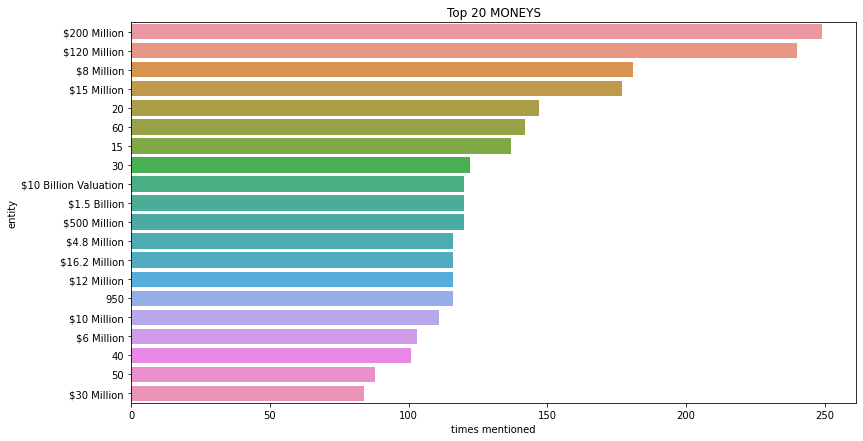

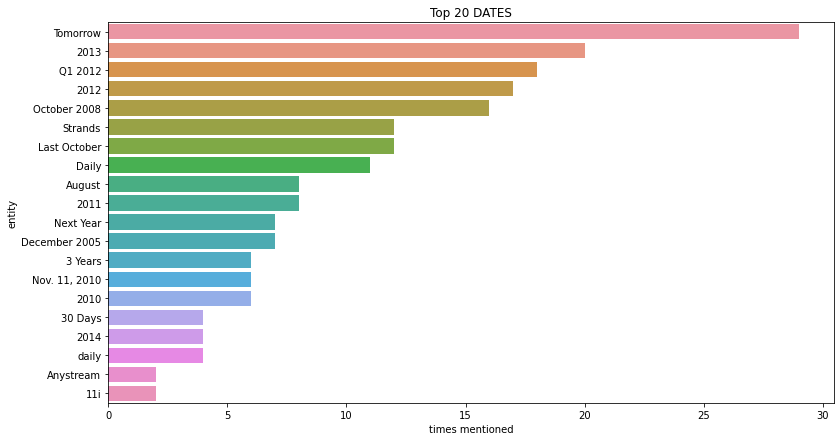

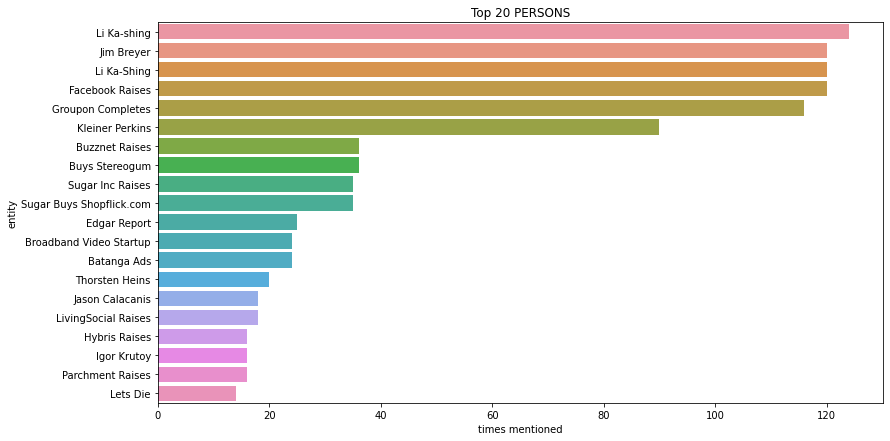

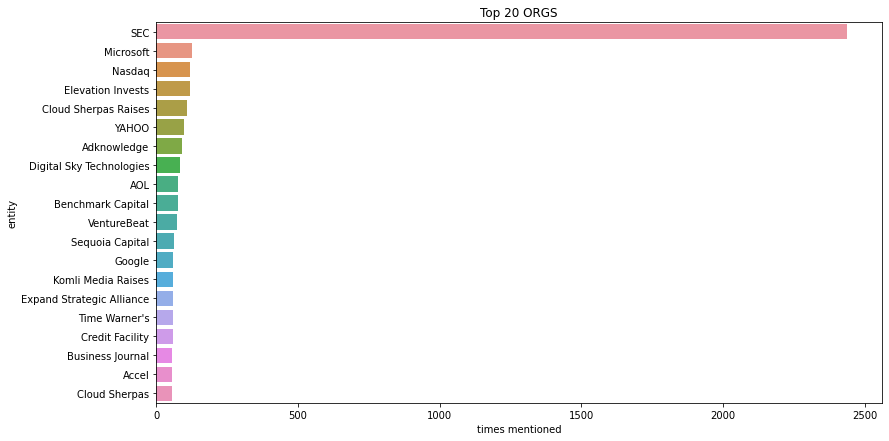

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


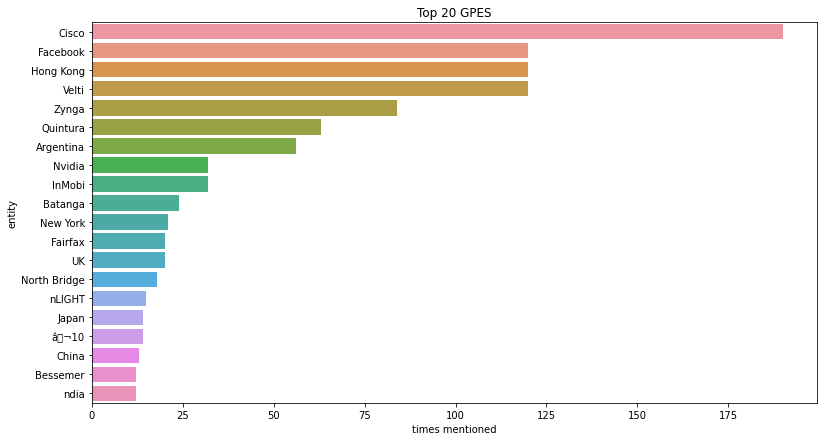

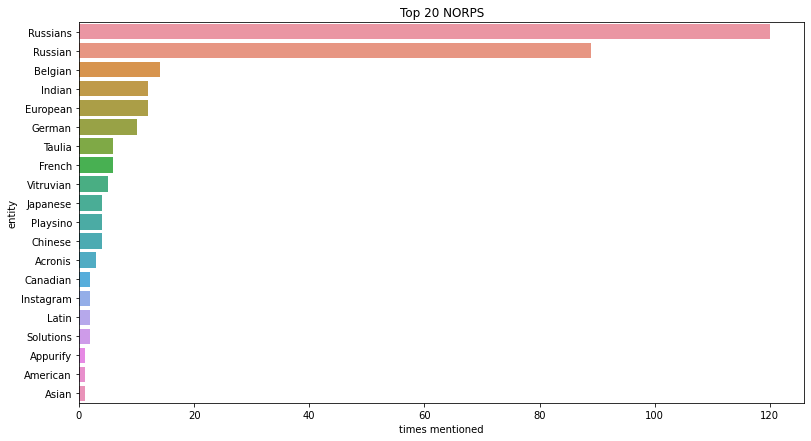

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


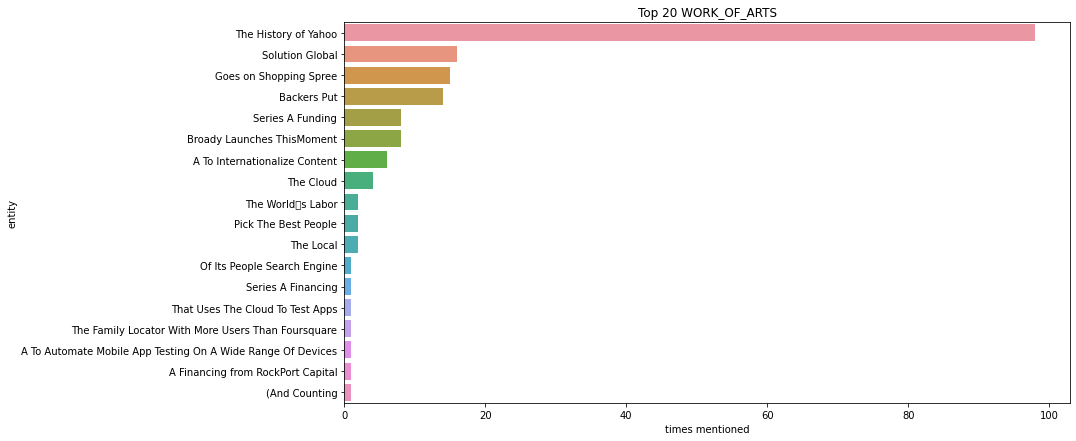

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)


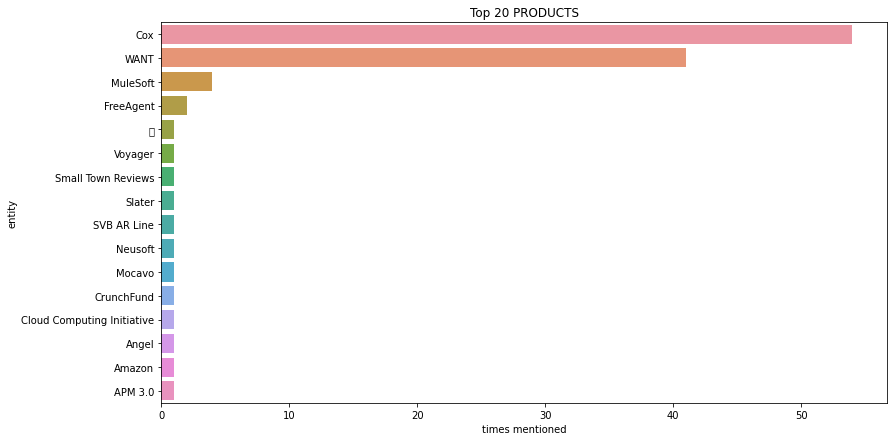

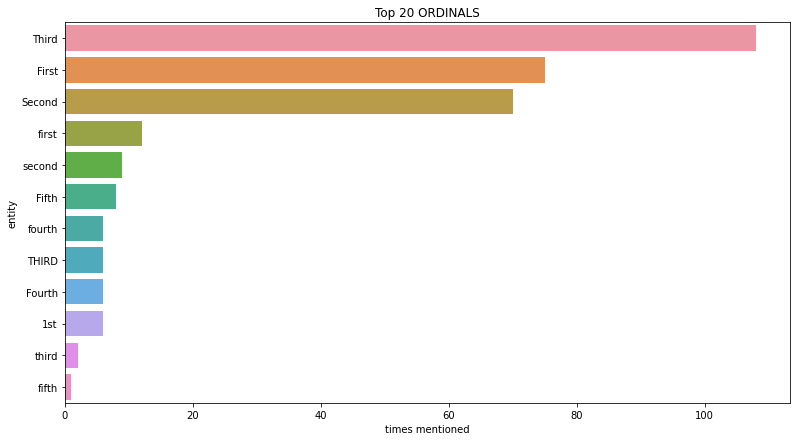

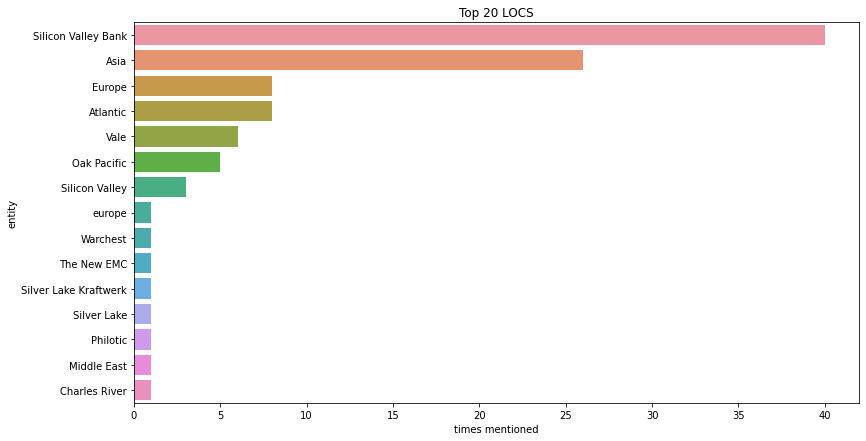

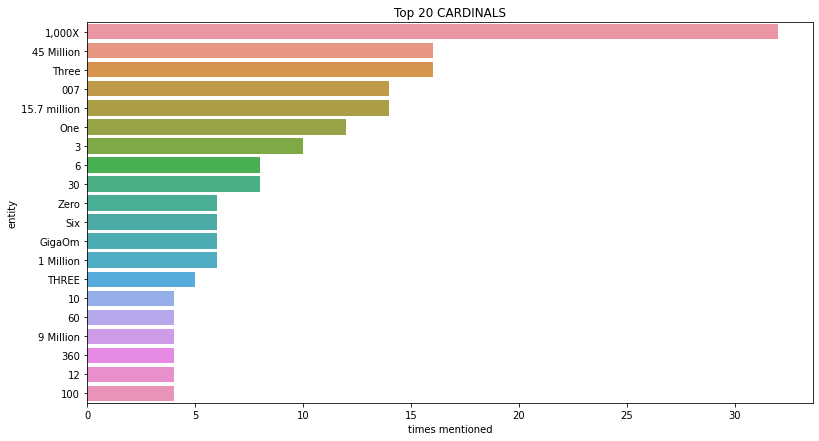

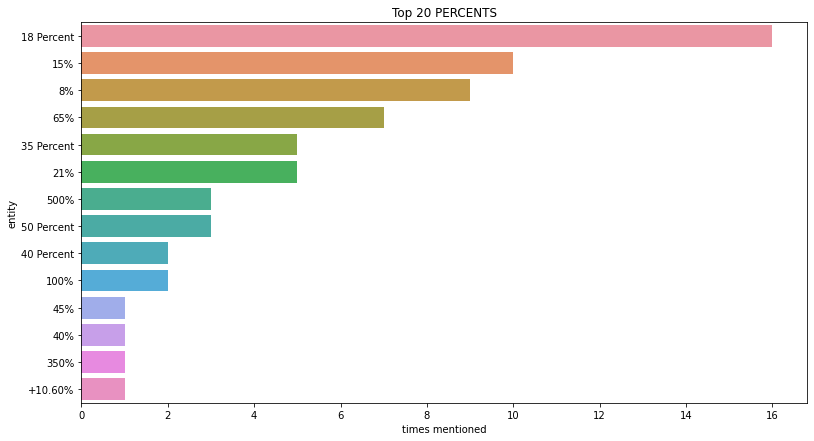

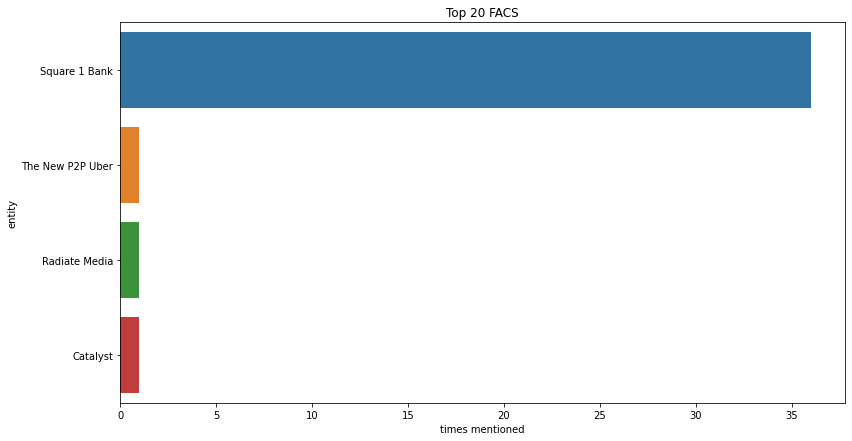

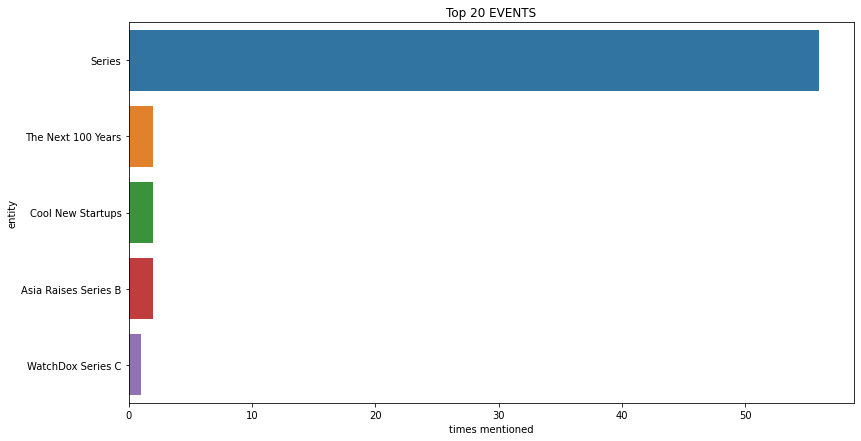

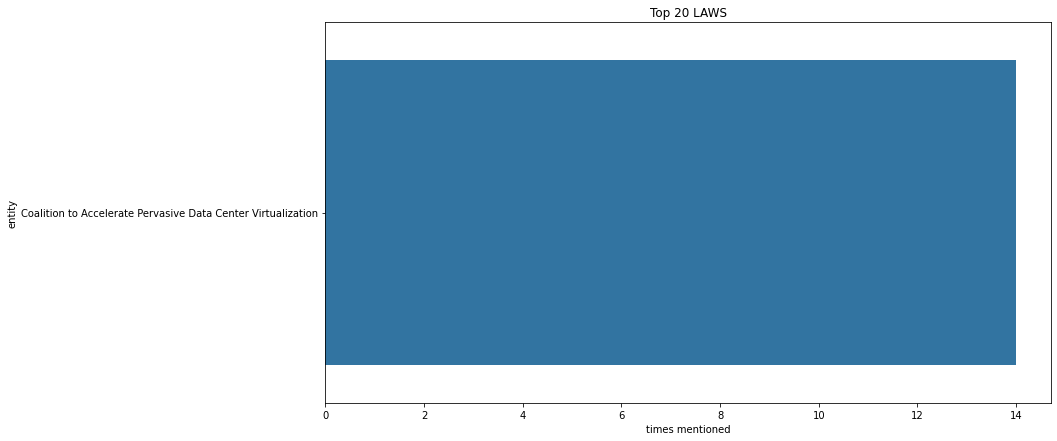

In [24]:
#fetch top NERs 
types = list(ner_1.type.unique())
for i in types:
    top_entities(df = ner_1, entity_type= str(i), n=20)
#top_entities(df = ner_1, entity_type= str(types[0]), n=20)

In [25]:
data_spacy_fund=data[data['source_description_acquisition'].isnull()==False].reset_index().drop('index', axis=1)
data_ent=[]
for i in range(data_spacy_fund.shape[0]):
    data_ent.append(data_spacy_fund.loc[i, 'source_description_acquisition'])

In [26]:
ner_1 = fetch_entities(data_ent, 0, data_spacy_fund.shape[0])

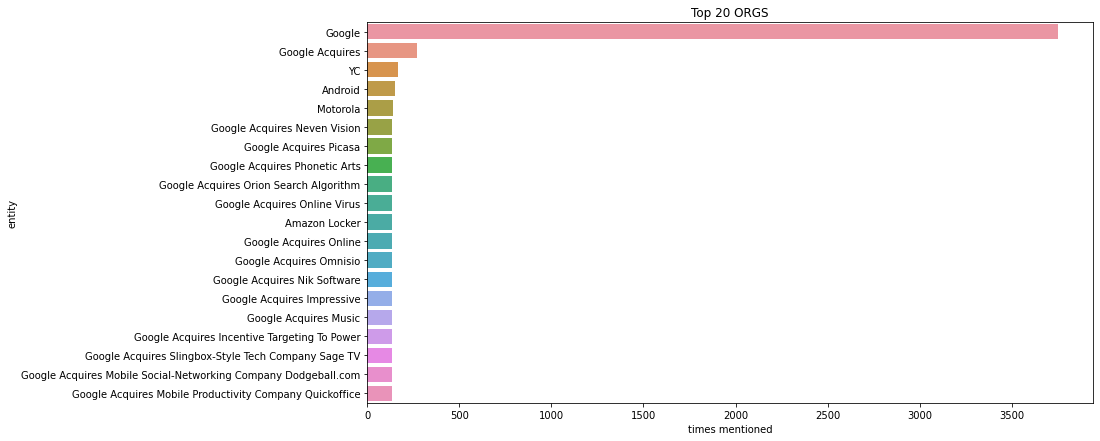

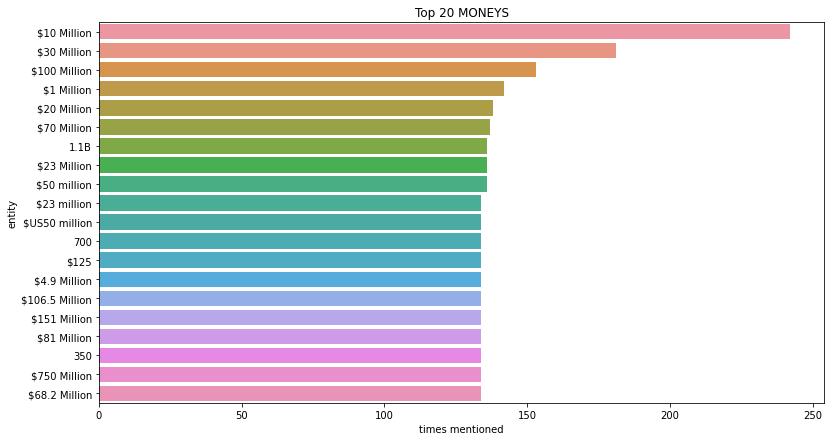

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags

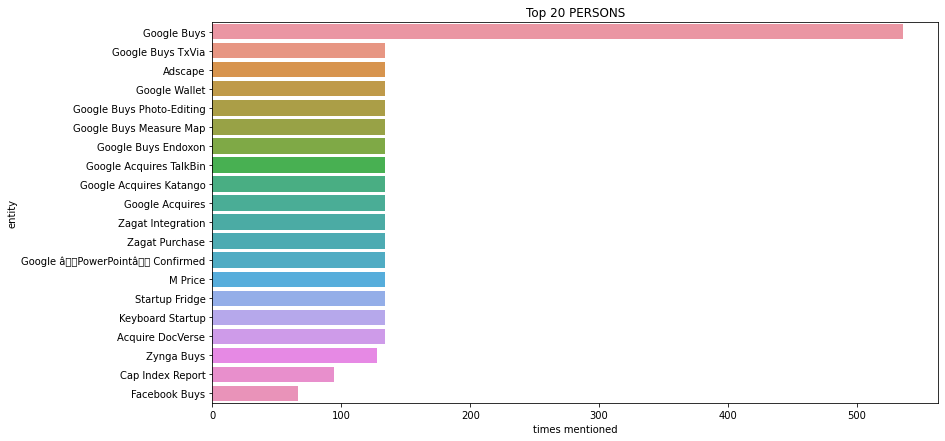

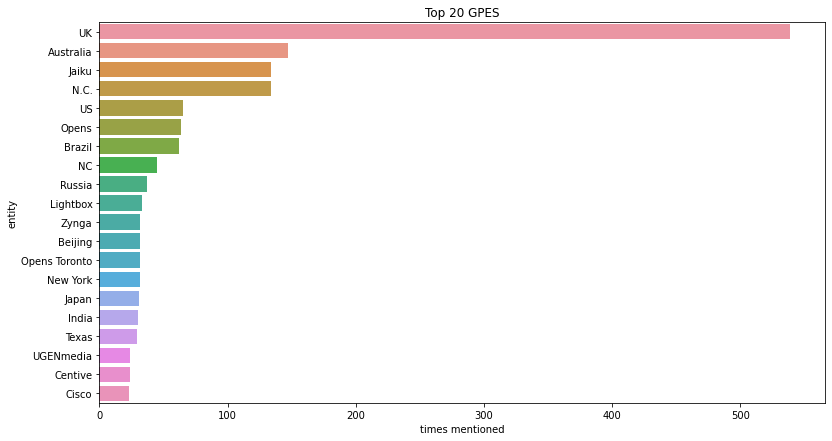

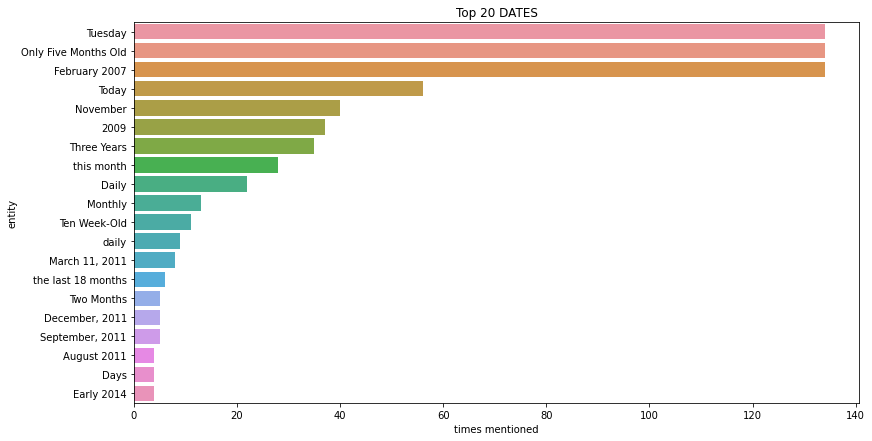

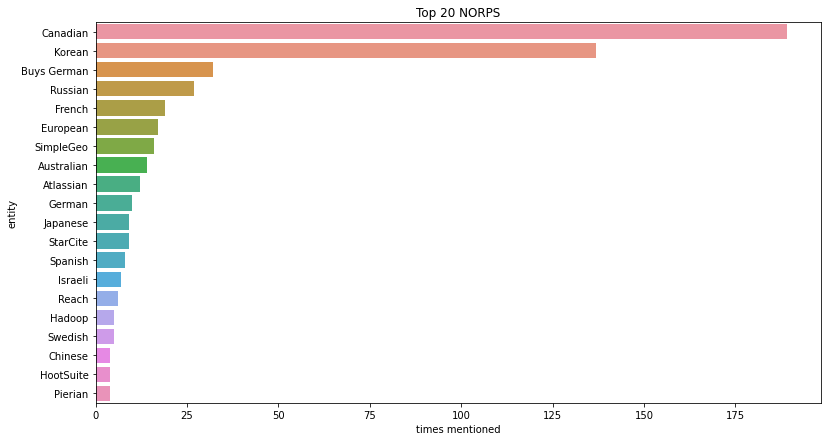

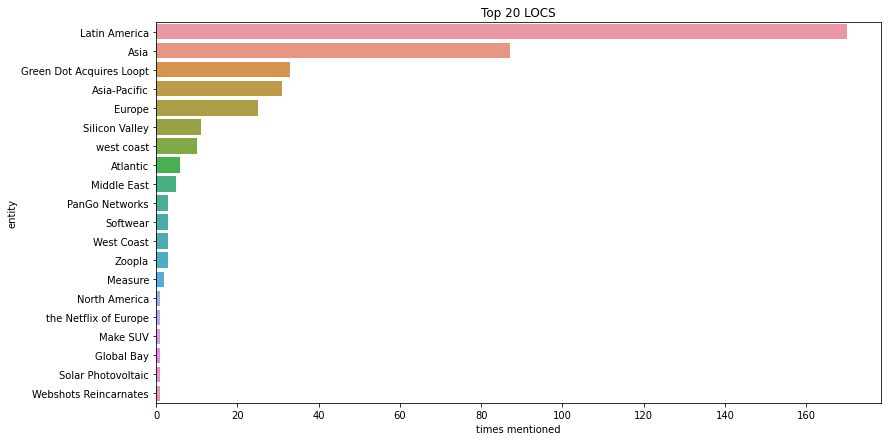

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags

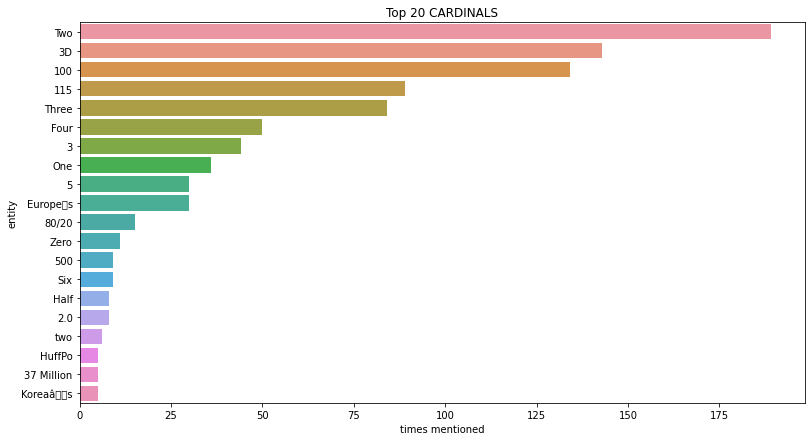

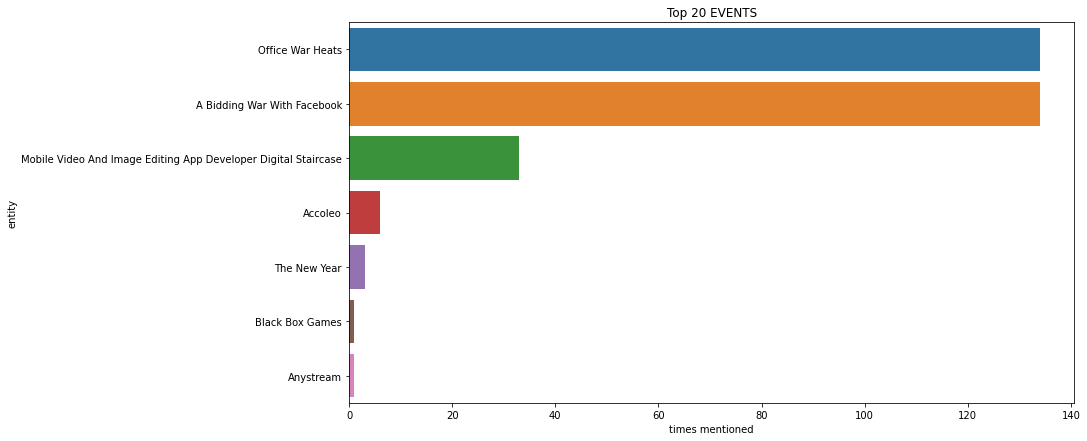

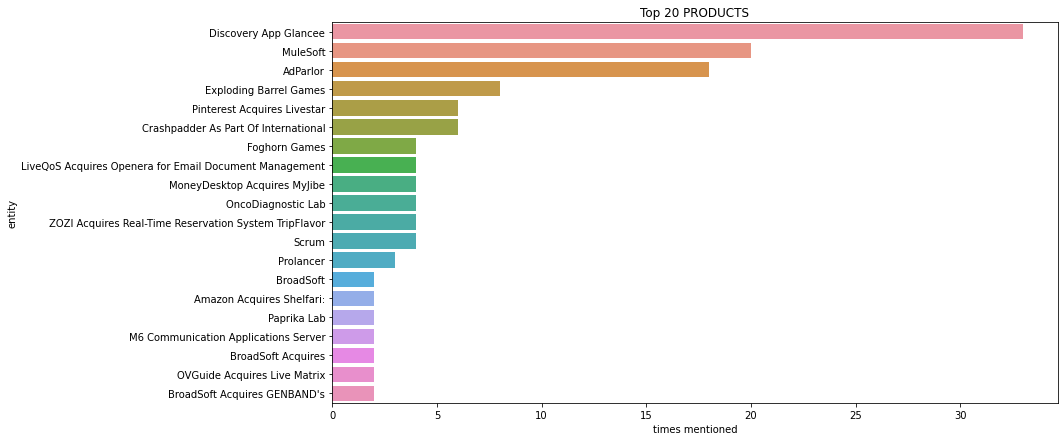

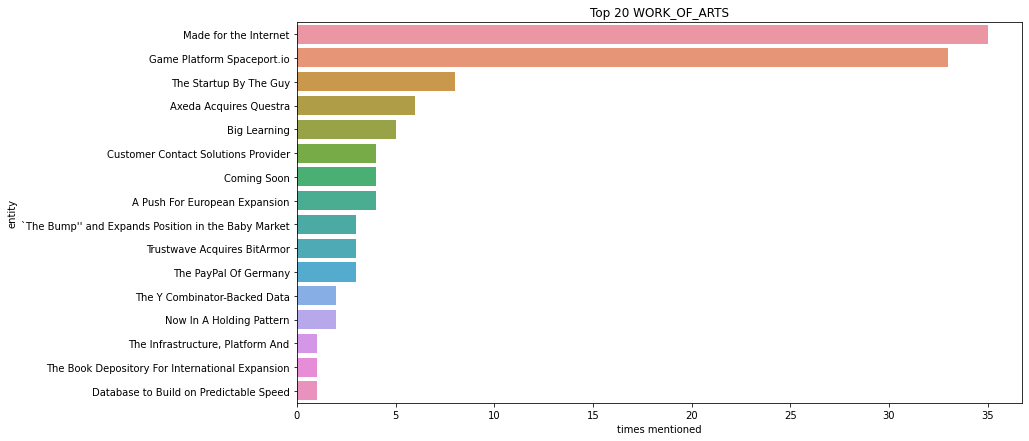

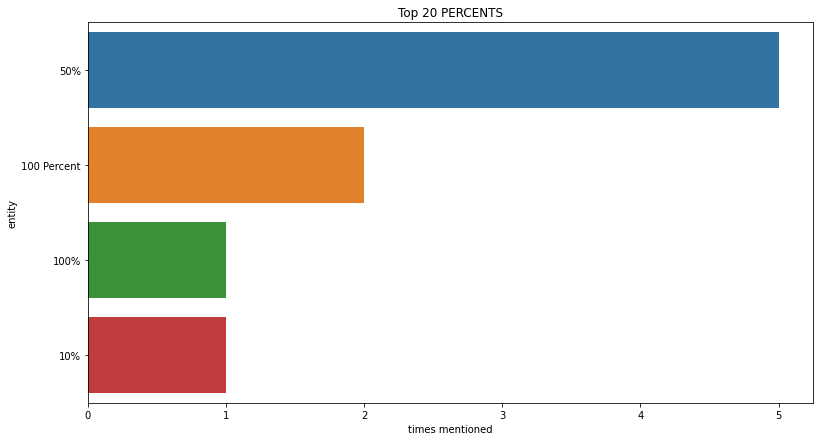

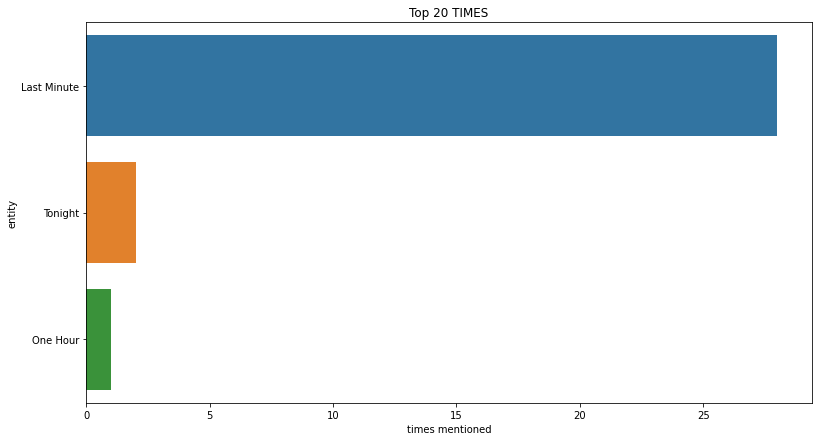

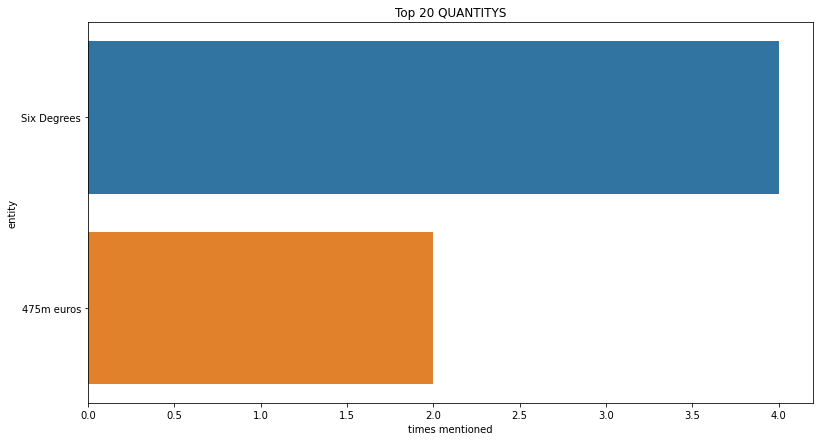

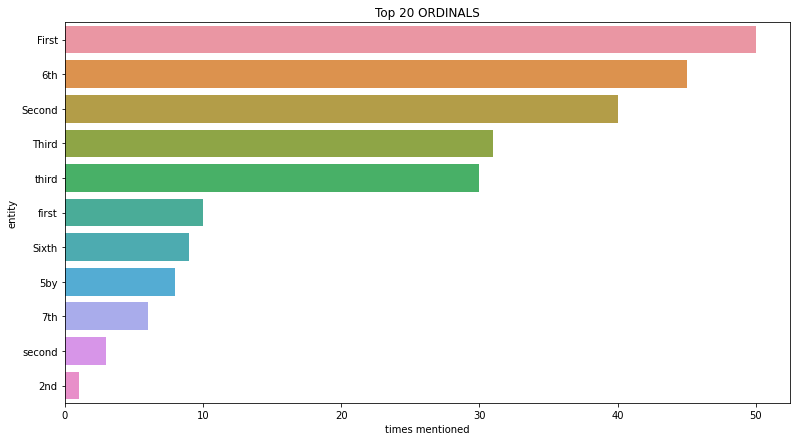

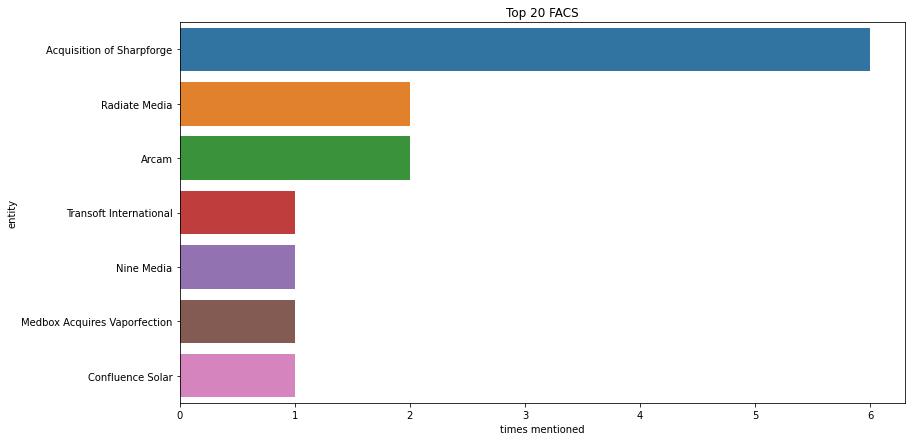

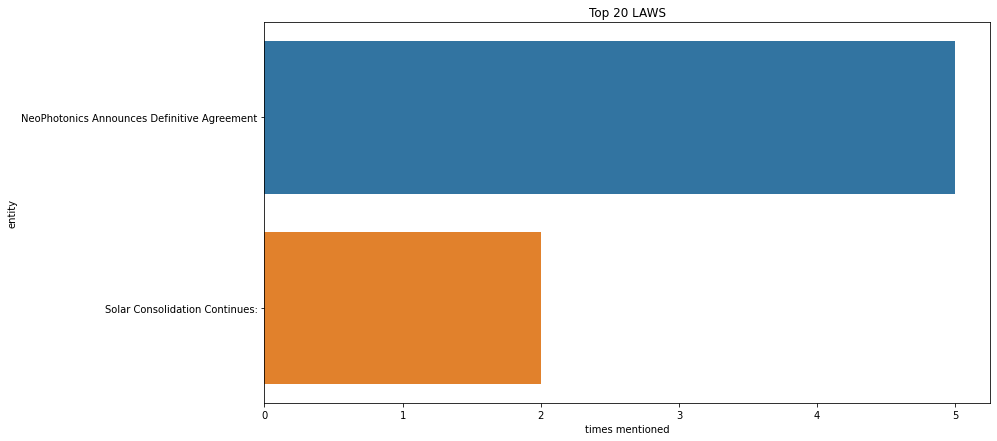

In [27]:
#fetch top NERs 
types = list(ner_1.type.unique())
for i in types:
    top_entities(df = ner_1, entity_type= str(i), n=20)
#top_entities(df = ner_1, entity_type= str(types[0]), n=20)

### Topic Modeling